<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [153]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-07-12 18:22:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  33.3MB/s    in 1.1s    

2021-07-12 18:22:51 (33.3 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [154]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Demo: How to run an sql query


In [135]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


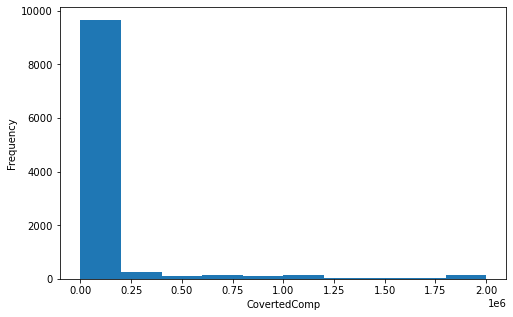

In [12]:
# your code goes here
df["ConvertedComp"].plot(kind='hist', figsize=(8, 5))

plt.xlabel("CovertedComp")
plt.show()

### Box Plots


Plot a box plot of `Age.`


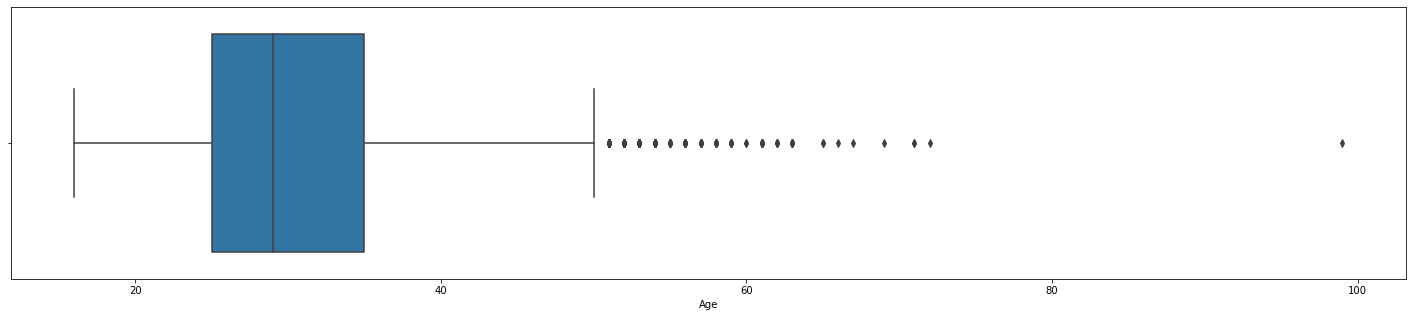

In [14]:
# your code goes here

plt.figure(figsize=(25,5))
sns.boxplot(x=df.Age, data=df)
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


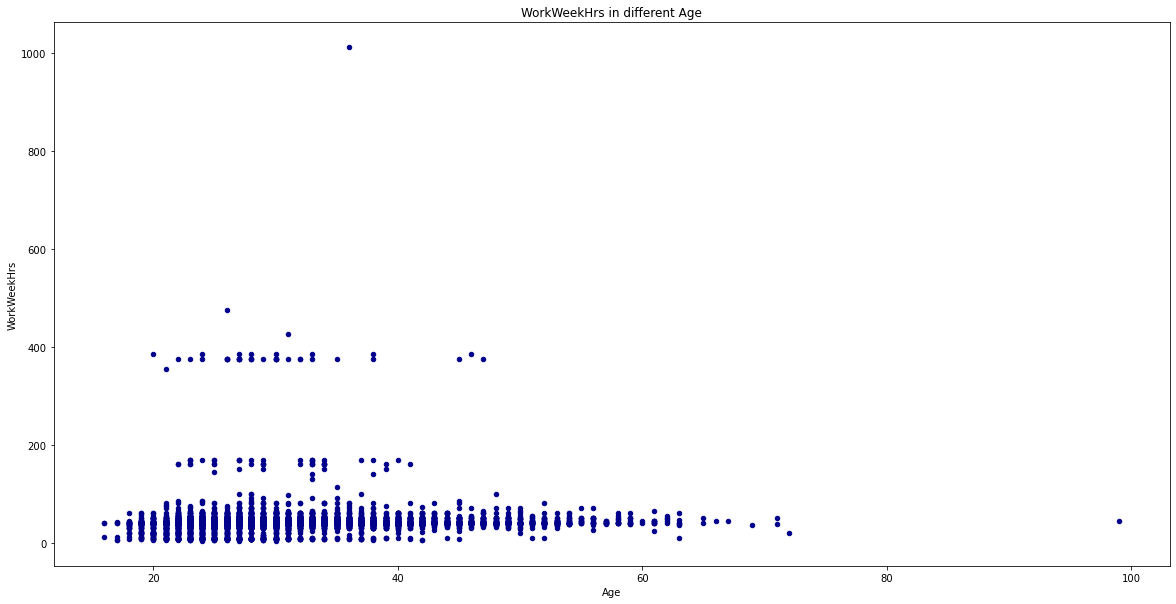

In [137]:
# your code goes here

df.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(20, 10), color='darkblue')

plt.title('WorkWeekHrs in different Age')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


Text(0.5, 1.0, 'CodeRevHrs VS WorkWeekHrs')

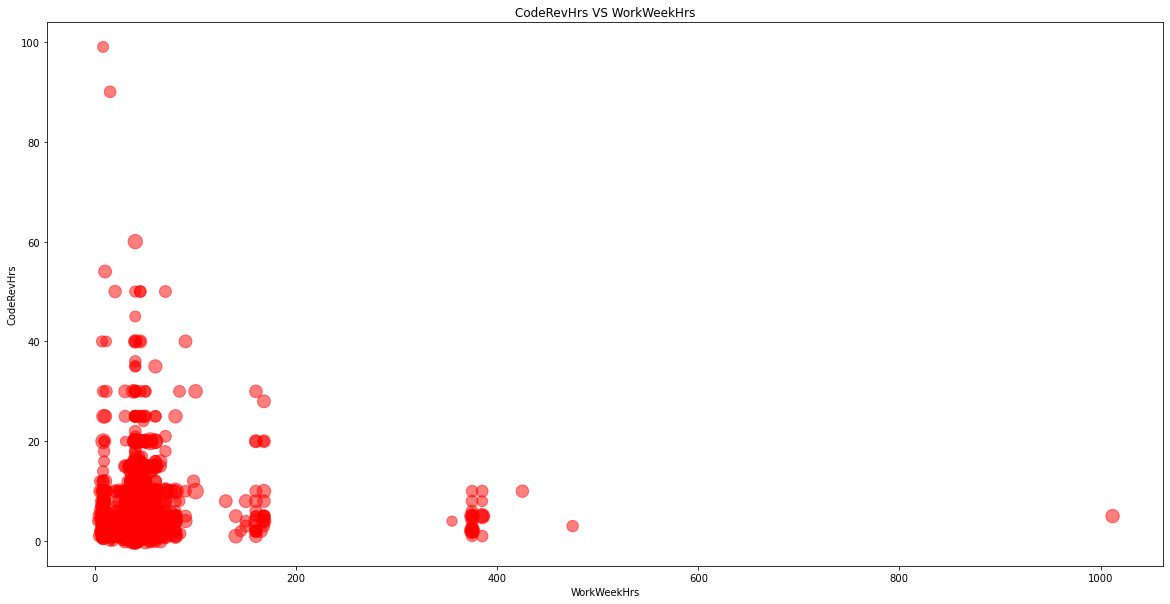

In [27]:
# your code goes here

ax0 = df.plot(kind='scatter',
                    x='WorkWeekHrs',
                    y='CodeRevHrs',
                    figsize=(20,10),
                    alpha=0.5,
                    color="red",
                    s=df.Age*5,
                    )

ax0.set_xlabel('WorkWeekHrs')
ax0.set_ylabel('CodeRevHrs')
ax0.set_title('CodeRevHrs VS WorkWeekHrs')



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


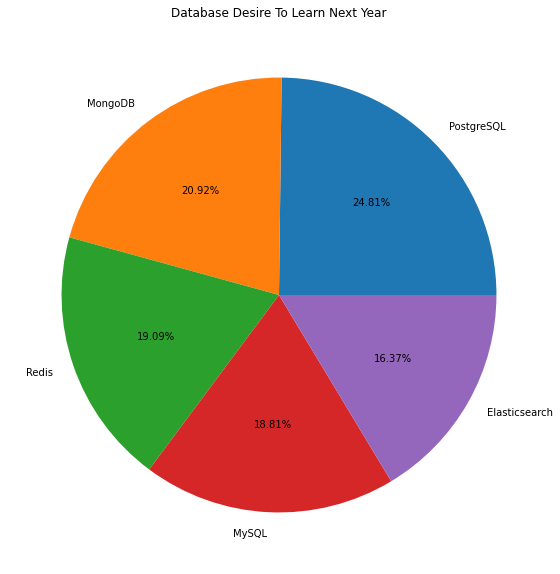

,Respondent
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


In [51]:
# your code goes here

df_pie = pd.read_sql_query("SELECT * FROM DatabaseDesireNextYear",conn)
df_pie = df_pie.groupby("DatabaseDesireNextYear").count()
df_pie = df_pie.sort_values(by="Respondent", ascending=False)
df_pie = df_pie.head(5)

plt.figure(figsize=(10,10))
plt.pie(df_pie.Respondent, labels=['PostgreSQL','MongoDB','Redis','MySQL','Elasticsearch'], autopct='%.2f%%')
plt.title("Database Desire To Learn Next Year")

plt.show()
df_pie


In [94]:
#In the list of most popular languages respondents wish to learn next year, what is the rank of Python?

df_python = pd.read_sql_query("SELECT * FROM LanguageDesireNextYear",conn)
df_python = df_python.groupby("LanguageDesireNextYear").count()
df_python = df_python.sort_values(by="Respondent", ascending=False)
df_p = df_python.reset_index()
df_p2 = df_p[df_p['LanguageDesireNextYear']=="Python"].index.values.astype(int)
int(df_p2)+1

3

In [129]:
#How many respondents indicated that they currently work with 'SQL'? 


df_sql = pd.read_sql("SELECT * FROM LanguageWorkedWith", conn)
df_sql = df_sql[df_sql["LanguageWorkedWith"].str.contains("SQL")]
df_sql

,Respondent,LanguageWorkedWith
4,4,SQL
12,9,SQL
20,13,SQL
36,19,SQL
46,20,SQL
...,...,...
59752,25134,SQL
59758,25136,SQL
59762,25137,SQL
59772,25138,SQL


### Stacked Charts


In [127]:
#How many respondents indicated that they work on 'MySQL' only? 

import numpy as np


df_sql = pd.read_sql("SELECT * FROM DatabaseWorkedWith", conn)
df_mysql = df_sql[df_sql["DatabaseWorkedWith"].str.contains("MySQL")]
df_withoutmysql = df_sql[~df_sql["DatabaseWorkedWith"].str.contains("MySQL")]
list1 = df_withoutmysql["Respondent"].values.tolist()
set(list1)
list2 = df_mysql["Respondent"].values.tolist()
set(list2)

main_list = np.setdiff1d(list2,list1)
len(main_list)

474

Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


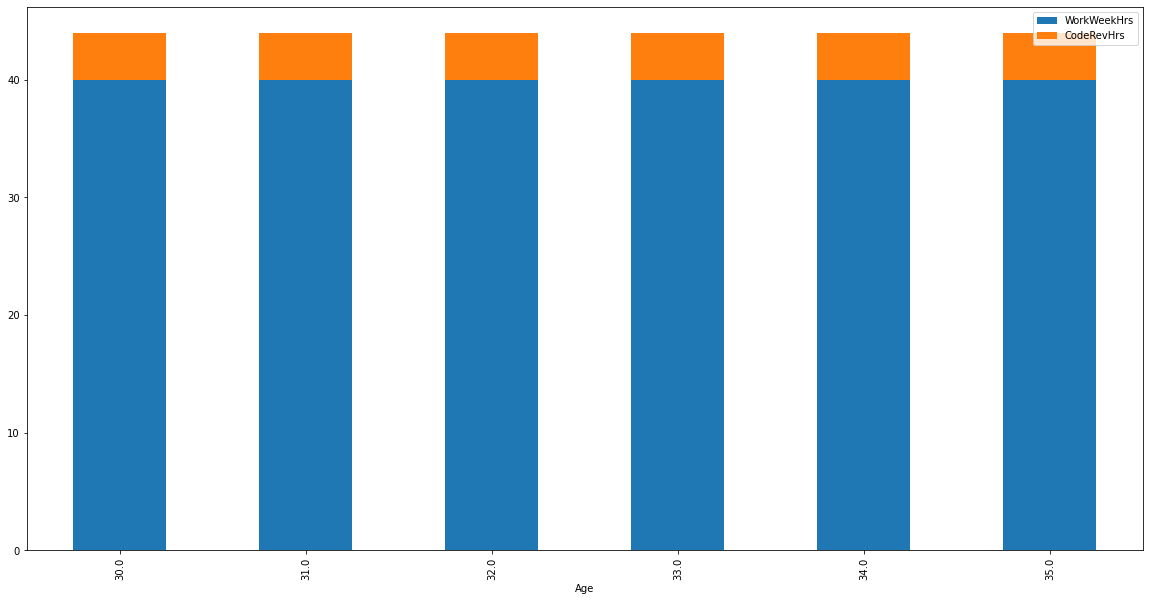

In [138]:
# your code goes here
QUERY1 = """
select WorkWeekHrs, CodeRevHrs, Age from master
where Age between 30 and 35
"""
df_stacked = pd.read_sql_query(QUERY1,conn)
df_stacked.groupby('Age').median().plot.bar(figsize=(20,10),stacked=True)


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


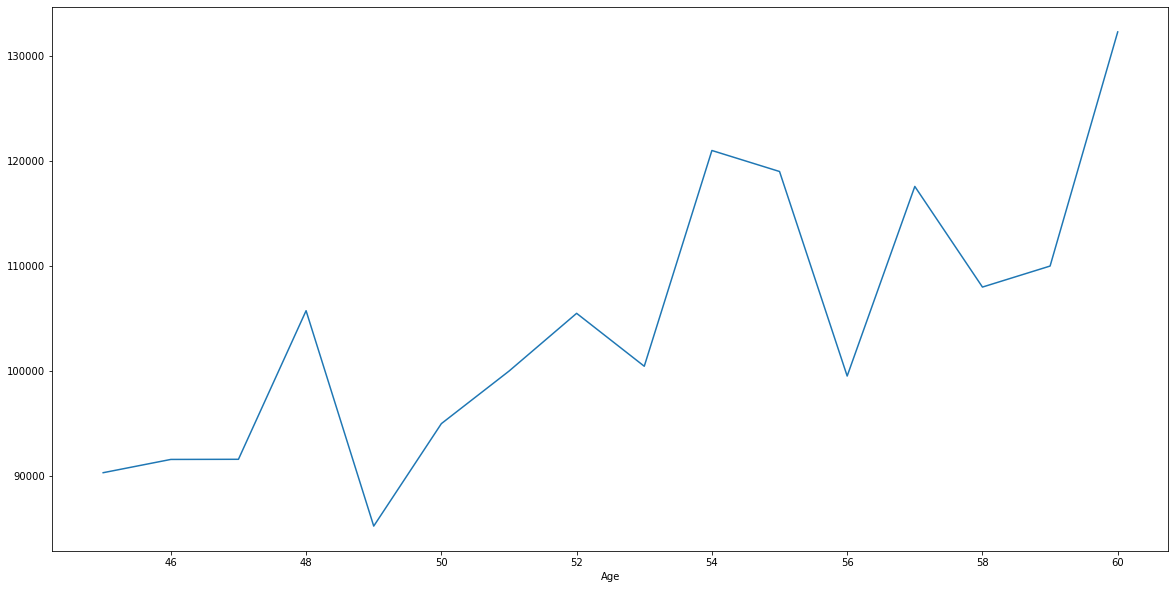

In [141]:
# your code goes here
QUERY2="""
Select ConvertedComp,Age from master
where age between 45 and 60
"""

df_line = pd.read_sql_query(QUERY2,conn)
df_line.groupby(['Age'])['ConvertedComp'].median().plot.line(figsize=(20,10))


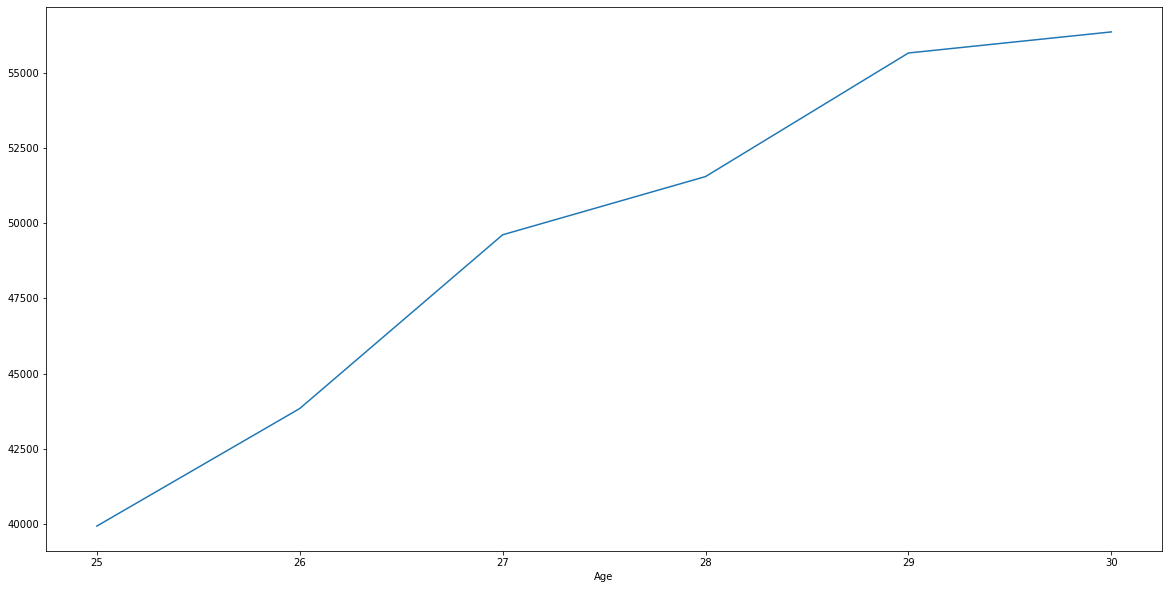

In [142]:
#Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp? 

QUERY3="""
Select ConvertedComp,Age from master
where age between 25 and 30
"""

df_line1 = pd.read_sql_query(QUERY3,conn)
df_line1.groupby(['Age'])['ConvertedComp'].median().plot.line(figsize=(20,10))


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


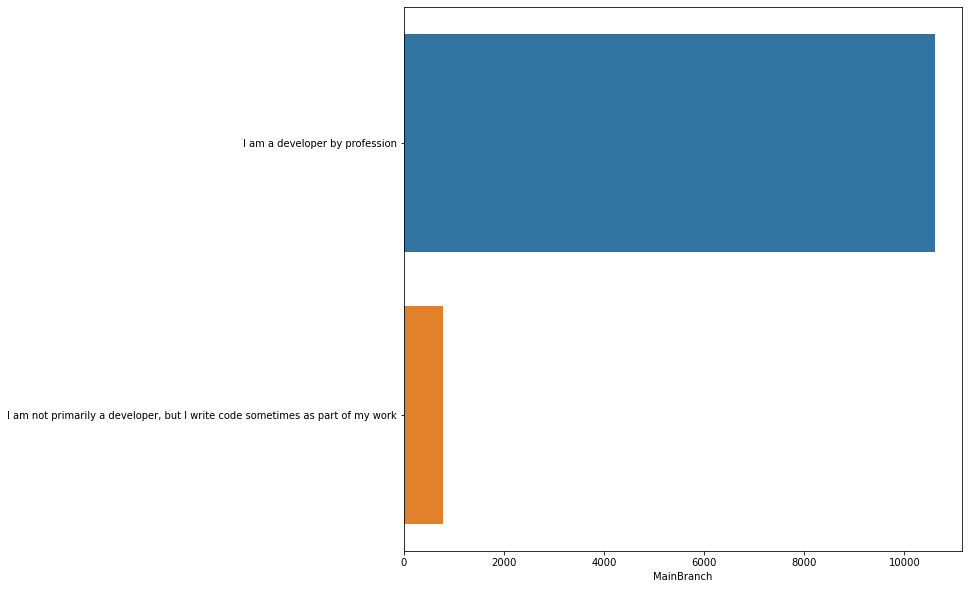

,MainBranch
I am a developer by profession,10618
"I am not primarily a developer, but I write code sometimes as part of my work",780


In [146]:
# your code goes here

df_bar = pd.DataFrame(df.MainBranch.value_counts())
df_bar

plt.figure(figsize=(10,10))
sns.barplot(x=df_bar.MainBranch,y=df_bar.index, orient='h')
plt.show()
df_bar

In [157]:
#Majority of the survey responders are?

df_job = pd.read_sql_query("SELECT * FROM DevType",conn)
df_job = df_job.groupby("DevType").count()
df_job = df_job.sort_values(by="Respondent", ascending=False)
df_job.head()


,Respondent
DevType,
"Developer, full-stack",6928
"Developer, back-end",6290
"Developer, front-end",3920
"Developer, desktop or enterprise applications",2575
"Developer, mobile",1959


Close the database connection.


In [158]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
